<a href="https://colab.research.google.com/github/fernanda0402/Python/blob/master/Projeto_1_FernandaA_Flavia_Victor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 1 de Introdução à Python.**

Alunos: Fernanda Araujo, Flávia Fialho e Victor Assis.

In [48]:
import matplotlib.pyplot as plt
import numpy as np

Temos que $\beta$ e $\gamma$ são definidos como:

$\beta = \frac{v}{c}$ e $\gamma = \frac{1}{(1 - (v/c)^2)^{1/2}} = \frac{1}{(1 - \beta^2)^{1/2}}$

In [49]:
#Constantes

mcquad = 0.511
I = 0.75*(10**-6)
ZsobreA = 0.45636 #
K = 0.307 #
e = 1.6*10**(-19)
densidade = 8.96

In [50]:
def gamma(beta):
  global y # sem isso não há print()
  y = 1/((1-(float(beta))**2)**(1/2))
  return y

#Teste para beta = 0.6
print(gamma(0.6))

1.25


[1.0, 1.00001250023438, 1.0000500037503126, 1.0001125189879354, 1.000200060020007, 1.0003126465607106, 1.0004503039779922, 1.0006130633094494, 1.0008009612817945, 1.001014040333908, 1.0012523486435176, 1.0015159401575338, 1.0018048746260764, 1.0021192176402405, 1.002459040673642, 1.0028244211278003, 1.00321544238141, 1.0036321938435673, 1.0040747710110163, 1.0045432755294885, 1.005037815259212, 1.0055585043446753, 1.0061054632887345, 1.0066788190311604, 1.0072787050317253, 1.0079052613579391, 1.0085586347775501, 1.009238978855929, 1.009946454058471, 1.0106812278581463, 1.0114434748483472, 1.012233376861183, 1.0130511230913848, 1.0138969102259876, 1.0147709425799718, 1.0156734322380512, 1.0166045992028059, 1.0175646715493711, 1.0185538855869014, 1.019572486027043, 1.0206207261596576, 1.0216988680360581, 1.0228071826600218, 1.02394595018687, 1.025115460130912, 1.0263160115815708, 1.0275479134285173, 1.0288114845961682, 1.0301070542879114, 1.0314349622404462, 1.0327955589886444, 1.0341892

Text(0.5, 0, '$\\beta$')

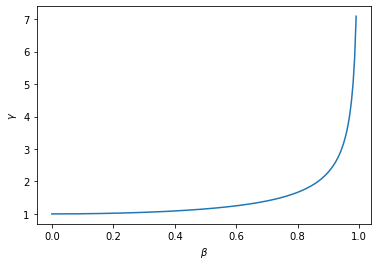

In [51]:
#beta vai de 0 a 0.995, fazer grafico gamma x beta
beta = 0
betalimit = 0.995
betalist = []
gammalist = []
gammabetalist = []
gammabetaquadradolist = []
colcheteslist = []
menosdEsobredxlist = []

while beta <= betalimit:
  betalist.append(beta)
  gamma(beta)
  gammalist.append(gamma(beta))
  gammabetalist.append(beta*(gamma(beta)))
  gammabetaquadradolist.append((2*mcquad*beta*(gamma(beta)))**2)
  beta = beta + 0.005
  colcheteslist.append(round((np.log(((2*mcquad*beta*(gamma(beta)))**2)/I))- (beta)**2, 2))
  menosdEsobredxlist.append((K*ZsobreA*densidade*(e/beta)**2)*(round((np.log(((2*mcquad*beta*(gamma(beta)))**2)/I))- (beta)**2, 2)))

print(gammalist)
print(betalist)
print(gammabetalist)
print(gammabetaquadradolist)



#Outra forma de fazer as listas
Gamma2 = []
Beta2 = []
for i in gammabetaquadradolist:
  Gamma2.append(i + 1)

for i in Gamma2:
  Beta2.append(1 - 1/i)
#print(Gamma2)
#print(Beta2)

#gráfico gamma x beta
dadosdegamma = gammalist
dadosdebeta = betalist
plt.plot(dadosdebeta,dadosdegamma)
plt.ylabel(r"$\gamma$")
plt.xlabel(r"$\beta$")

Text(0.5, 0, '$\\beta$')

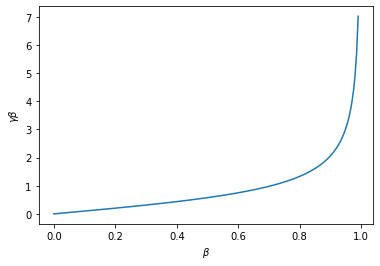

In [52]:
#grafico gamma*beta x beta

dadosdegammabeta = gammabetalist
dadosdebeta = betalist
plt.plot(dadosdebeta,dadosdegammabeta)
plt.ylabel(r"$\gamma\beta$")
plt.xlabel(r"$\beta$")

Observamos que $\beta$ e $\gamma \beta$ são diretamente proporcionais, pois o segundo cresce junto do primeiro. O gráfico parece o de uma exponencial, com o crescimento começando lentamente e acentuando perto do valor de 0,8. Ou seja, em baixas velocidades ($\beta = 0,1$), o produto $\gamma \beta$ também possui baixos valores e, quanto mais próximo de 1 (ou seja, quanto mais próxima a partícula está da velocidade da luz $c$), mais rápido o produto $\gamma \beta$ cresce.

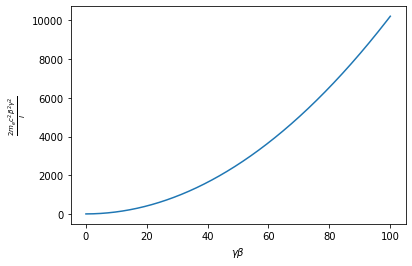

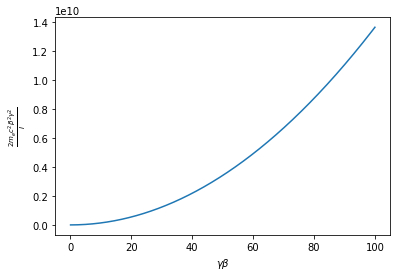

In [60]:
#5
#Gráfico deve ser: ln_argument vs gamma*beta
#Intervalo 0.1 até 100

N_intervals = 1000
GammaBeta = np.linspace(0.1,100, N_intervals)
ln_argument_list = []

for element in GammaBeta:
    value = 2*mcquad*(element)**2            #Considerando I igual a 1
    ln_argument_list.append(value)

#Trace o argumento do log natural na equação de Bethe-Block em uma função de Gamma*Beta.
plt.plot(GammaBeta,ln_argument_list)
plt.xlabel(r"$\gamma\beta$")
plt.ylabel(r"$\frac{2m_{e}c^2\beta^2\gamma^2}{I}$")
plt.show()

#Definindo ln_argument
#Qual deve ser o argumento da função? Gamma, Beta ou Gamma*Beta
def ln_argument(gamma_beta):
    """
    Dado um valor de gamma_beta, produz um argumento do log natural da eq. de Bethe-Block
    """
    return 2*mcquad*(gamma_beta)**2/I

lnArgumentList = [ln_argument(gamma_beta) for gamma_beta in GammaBeta]

plt.plot(GammaBeta,lnArgumentList)
plt.xlabel(r"$\gamma\beta$")
plt.ylabel(r"$\frac{2m_{e}c^2\beta^2\gamma^2}{I}$")
plt.show()

#print(ln_argument_list)
#print(lnArgumentList)

A função ln_argument() deve aceitar o produto $\gamma \beta$, pois é ele que está presente no argumento do logaritmo da função de Beth-Bloch.

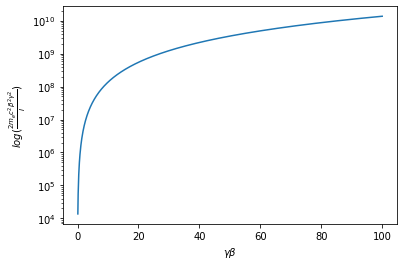

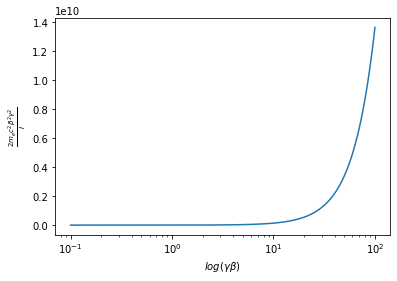

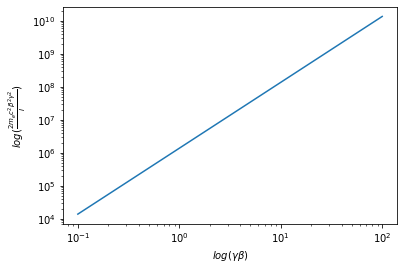

In [36]:
#6
#semilog no eixo y
plt.semilogy(GammaBeta,lnArgumentList)
plt.xlabel(r"$\gamma\beta$")
plt.ylabel(r"$log(\frac{2m_{e}c^2\beta^2\gamma^2}{I})$")
plt.show()

#semilog no eixo x
plt.semilogx(GammaBeta,lnArgumentList)
plt.xlabel(r"$log(\gamma\beta)$")
plt.ylabel(r"$\frac{2m_{e}c^2\beta^2\gamma^2}{I}$")
plt.show()

#log dos dois
plt.loglog(GammaBeta,lnArgumentList)
plt.xlabel(r"$log(\gamma\beta$)")
plt.ylabel(r"$log(\frac{2m_{e}c^2\beta^2\gamma^2}{I})$")
plt.show()

Aplicando-se a função logarítmica em ambos os eixos temos melhora na resolução do gráfico, pois assim obtemos uma reta, que nos proporciona uma melhor análise.

In [21]:
#7 
#Provavel que agora, seus valores não estão uniformemente espaçados no gráfico. Faça um vetor de valores
#que tenham um logaritmo uniformemente espacado de 0,1 a 100.
#Repita o grafico mais uma vez usando os novos argumentos. Uma identidade util aqui é gamma**2 = (gamma*beta)**2 +1
#têm que encontrar valores de \Gamma\Beta tais que ln(\Gamma\Beta) seja igual a 0.1, 0.2, 0.3....100. E guardar esses valores em uma lista, por exemplo.

log_gammabeta = []
n_intervals = 1000
loggammabeta = np.linspace(0.1,100, n_intervals)

for element in loggammabeta:
    add = round(np.log(float(element) + 0.1), 2)
    log_gammabeta.append(add)

#print(log_gammabeta)
#print(loggammabeta)

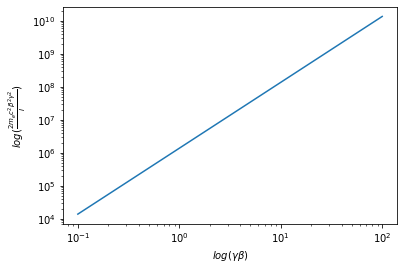

In [37]:
plt.loglog(loggammabeta,lnArgumentList)
plt.xlabel(r"$log(\gamma\beta$)")
plt.ylabel(r"$log(\frac{2m_{e}c^2\beta^2\gamma^2}{I})$")
plt.show()

In [55]:
#8
#Plote o conteúdo dos colchetes versus \Gamma\Beta usando o mesmo espaçamento do vetor de log para o argumento x.

print('O conteúdo dos colchetes é: ',colcheteslist)

O conteúdo dos colchetes é:  [3.55, 4.94, 5.75, 6.32, 6.77, 7.13, 7.44, 7.71, 7.94, 8.16, 8.35, 8.52, 8.68, 8.83, 8.97, 9.1, 9.22, 9.33, 9.44, 9.54, 9.64, 9.73, 9.82, 9.91, 9.99, 10.07, 10.14, 10.21, 10.28, 10.35, 10.42, 10.48, 10.54, 10.6, 10.66, 10.72, 10.77, 10.83, 10.88, 10.93, 10.98, 11.03, 11.07, 11.12, 11.16, 11.21, 11.25, 11.29, 11.34, 11.38, 11.42, 11.45, 11.49, 11.53, 11.57, 11.6, 11.64, 11.67, 11.71, 11.74, 11.78, 11.81, 11.84, 11.87, 11.9, 11.94, 11.97, 12.0, 12.03, 12.06, 12.08, 12.11, 12.14, 12.17, 12.2, 12.22, 12.25, 12.28, 12.3, 12.33, 12.35, 12.38, 12.4, 12.43, 12.45, 12.48, 12.5, 12.53, 12.55, 12.57, 12.6, 12.62, 12.64, 12.67, 12.69, 12.71, 12.73, 12.75, 12.78, 12.8, 12.82, 12.84, 12.86, 12.88, 12.9, 12.93, 12.95, 12.97, 12.99, 13.01, 13.03, 13.05, 13.07, 13.09, 13.11, 13.13, 13.15, 13.17, 13.19, 13.21, 13.23, 13.25, 13.27, 13.29, 13.31, 13.33, 13.35, 13.37, 13.39, 13.41, 13.43, 13.45, 13.47, 13.49, 13.51, 13.53, 13.55, 13.57, 13.6, 13.62, 13.64, 13.66, 13.68, 13.7, 1

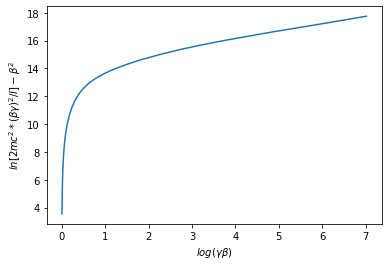

In [56]:
#Plotando o conteúdo dos colchetes x gamma*beta

plt.plot(gammabetalist,colcheteslist)
plt.xlabel(r"$log(\gamma\beta$)")
plt.ylabel(r"$ln[2mc^2*(\beta\gamma)^2/I] - \beta^2$") 
plt.show()

#x = 2*m*c^2*(beta*gamma)^2

[4.56333409910784e-33, 1.587526087999488e-33, 8.21257310481067e-34, 5.0775125891481605e-34, 3.480988377572967e-34, 2.5458976624913066e-34, 1.951779574438766e-34, 1.5485609993011201e-34, 1.260054694728439e-34, 1.0489241196822532e-34, 8.870641305447671e-35, 7.605556831846403e-35, 6.60217351116861e-35, 5.79106641206126e-35, 5.124645617401857e-35, 4.569359628288e-35, 4.1009737700447674e-35, 3.701609037095822e-35, 3.361388466745582e-35, 3.0657892468654064e-35, 2.8099096621251037e-35, 2.584171853353467e-35, 2.3862158658770986e-35, 2.211592376866132e-35, 2.0546572462011184e-35, 1.9148585039593273e-35, 1.7879869303871204e-35, 1.6740313722294848e-35, 1.571270772180287e-35, 1.478263158865919e-35, 1.3937928892352058e-35, 1.3155738710015993e-35, 1.2441325264060993e-35, 1.1786963655768572e-35, 1.1186005518020017e-35, 1.0632703343426364e-35, 1.0112677753349602e-35, 9.640846688255992e-36, 9.195039401115512e-36, 8.78120452521983e-36, 8.396311452472797e-36, 8.037682461939803e-36, 7.695992272507215e-36,

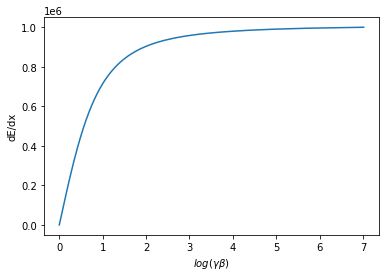

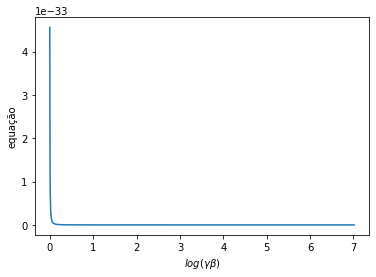

In [58]:
#9
#Finalmente, plote toda a equação −(dE/dx), a energia perdida por unidade de distância,
#para múons que passam pelo cobre. Os dados de que vc precisa sobre o cobre estão
#todos no PDG. Al´em disso, pode encontrar mais sobre o m´uon aqui. Convertendo para
#nossas unidades, a perda de energia deve ter uma largura m´ınima de 13 MeV / cm para
#o momento do m´uon ou energia em torno de 300 MeV.

print(menosdEsobredxlist)

menos_dEsobredx= []
n_intervals = 199
menosdEsobredx = np.linspace(0.001,1000000, n_intervals)

for element in menosdEsobredx:
    add = round(element, 2)
    menos_dEsobredx.append(add)

plt.plot(gammabetalist,menosdEsobredx)
plt.xlabel(r"$log(\gamma\beta$)")
plt.ylabel("dE/dx")
plt.show()

plt.plot(gammabetalist,menosdEsobredxlist)
plt.xlabel(r"$log(\gamma\beta$)")
plt.ylabel("equação")
plt.show()


#print(gammabetalist)
#print(menosdEsobredxlist)

[5.09300680704e-34, 1.771792508928e-34, 9.165818197333335e-35, 5.66686672896e-35, 3.8850316713984004e-35, 2.841403641173333e-35, 2.1783254179004082e-35, 1.72830468672e-35, 1.4063110432237042e-35, 1.1706742407168003e-35, 9.900269314115704e-36, 8.488344678400002e-36, 7.368497222286394e-36, 6.463243763461227e-36, 5.719470555136001e-36, 5.099731728e-36, 4.57697965406782e-36, 4.131260086044444e-36, 3.751549628064265e-36, 3.421639784447998e-36, 3.1360598907646247e-36, 2.8841203720462798e-36, 2.6631873503092615e-36, 2.468295063466665e-36, 2.2931442479923193e-36, 2.137118866026035e-36, 1.9955211276641967e-36, 1.8683385850775497e-36, 1.7536504153797846e-36, 1.649847275519999e-36, 1.5555724210214347e-36, 1.468274409599999e-36, 1.3885407660782356e-36, 1.3155093365813138e-36, 1.2484381158504482e-36, 1.1866856410074065e-36, 1.1286470706863393e-36, 1.0759873535999991e-36, 1.0262320760173562e-36, 9.80045147903999e-37, 9.37088331749196e-37, 8.970627747700672e-37, 8.589277089851802e-37, 8.2403439201322

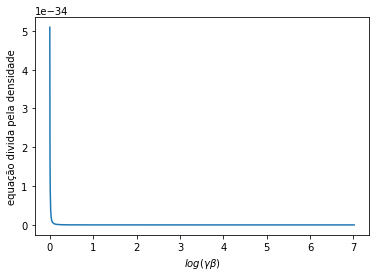

In [59]:
#Comparação com o gráfico do projeto
graficolist = []

for i in menosdEsobredxlist:
  graficolist.append(i/densidade)

print(graficolist)
plt.plot(gammabetalist,graficolist)
plt.xlabel(r"$log(\gamma\beta$)")
plt.ylabel("equação divida pela densidade")
plt.show()